In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [96]:
ads_data = pd.read_csv('/content/drive/MyDrive/Karpov_Courses/data/ads_data.csv.zip')

In [97]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [98]:
ads_grouped = ads_data.groupby(['ad_id', 'ad_cost_type', 'platform', 'event'], as_index=False).agg({'user_id': 'count'})
ads_grouped.head()

,ad_id,ad_cost_type,platform,event,user_id
0,3,CPC,android,click,5
1,3,CPC,android,view,244
2,3,CPC,ios,click,3
3,3,CPC,ios,view,147
4,3,CPC,web,click,1


In [99]:
ads_grouped = ads_grouped.pivot(index=['ad_id', 'ad_cost_type', 'platform'], columns='event', values='user_id').reset_index()
ads_grouped.head()

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0
3,2132,CPC,android,1.0,55.0
4,2132,CPC,ios,NaN,26.0


In [100]:
cost_type_df = ads_grouped.groupby(['ad_id', 'ad_cost_type'], as_index=False) \
    .agg({'click': 'sum', 'view': 'sum'})

In [101]:
cost_type_df['view'].describe()

count    3.550000e+02
mean     7.293665e+03
std      1.028083e+05
min      0.000000e+00
25%      2.160000e+02
50%      4.780000e+02
75%      1.450000e+03
max      1.934788e+06
Name: view, dtype: float64

In [102]:
cost_type_df.head()

event,ad_id,ad_cost_type,click,view
0,3,CPC,9.0,490.0
1,2132,CPC,1.0,95.0
2,2276,CPC,2.0,1454.0
3,2475,CPM,0.0,132.0
4,2643,CPM,3.0,286.0


In [103]:
cost_type_df = cost_type_df[cost_type_df['view'] > 100]

In [104]:
cost_type_df['ctr'] = cost_type_df['click'] / cost_type_df['view']

In [105]:
cost_type_df.head()

event,ad_id,ad_cost_type,click,view,ctr
0,3,CPC,9.0,490.0,0.018367
2,2276,CPC,2.0,1454.0,0.001376
3,2475,CPM,0.0,132.0,0.000000
4,2643,CPM,3.0,286.0,0.010490
5,4585,CPC,53.0,476.0,0.111345


<Axes: xlabel='ad_cost_type', ylabel='ctr'>

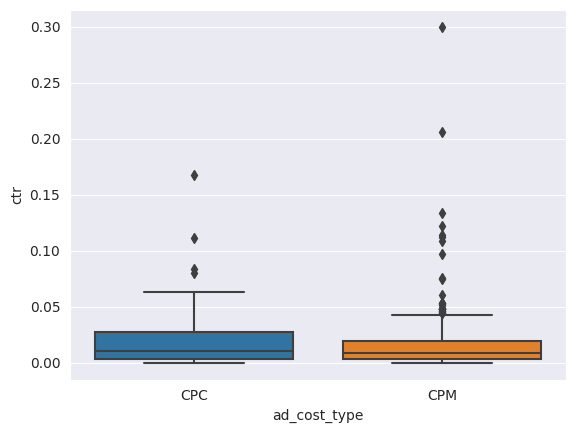

In [106]:
sns.boxplot(data=cost_type_df, x='ad_cost_type', y='ctr')

<Axes: xlabel='ctr', ylabel='Count'>

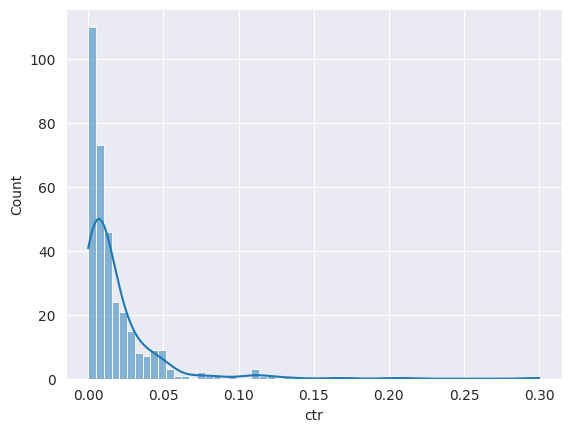

In [107]:
sns.set_style('darkgrid')
sns.histplot(cost_type_df['ctr'], kde=True)

In [108]:
cost_type_df.groupby('ad_cost_type').agg({'ctr': 'median'})

event,ctr
ad_cost_type,
CPC,0.010191
CPM,0.009132


In [109]:
cost_type_df.groupby('ad_cost_type').agg({'ctr': 'mean'})

event,ctr
ad_cost_type,
CPC,0.021046
CPM,0.017296


In [110]:
cost_type_df = cost_type_df[(cost_type_df['view'] > 100) & (cost_type_df['click'] > 0)] 

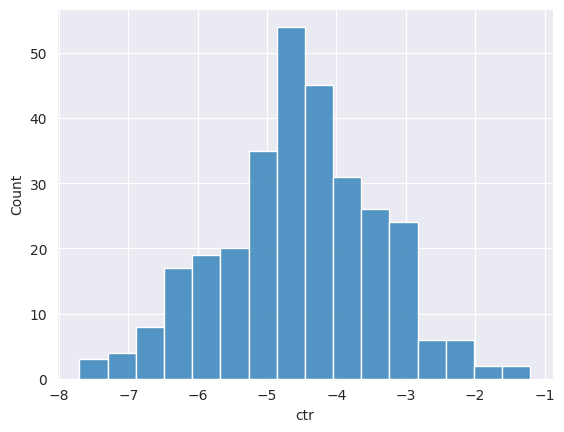

In [111]:
sns.histplot(np.log(cost_type_df['ctr']));

<Axes: xlabel='ctr', ylabel='Count'>

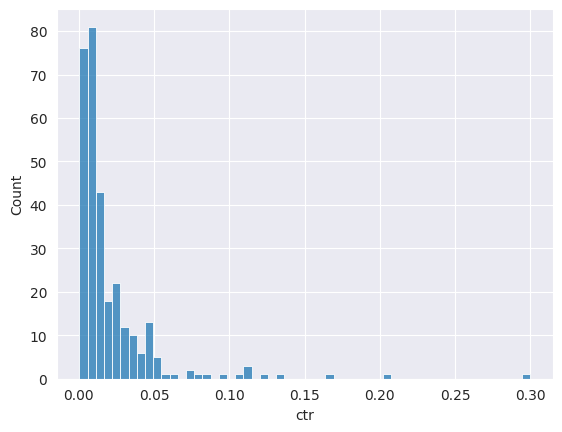

In [112]:
sns.histplot(cost_type_df['ctr'])

In [113]:
np.log(4)

1.3862943611198906

In [114]:
x = [1, 10, 20, 200, 2000]

<Axes: >

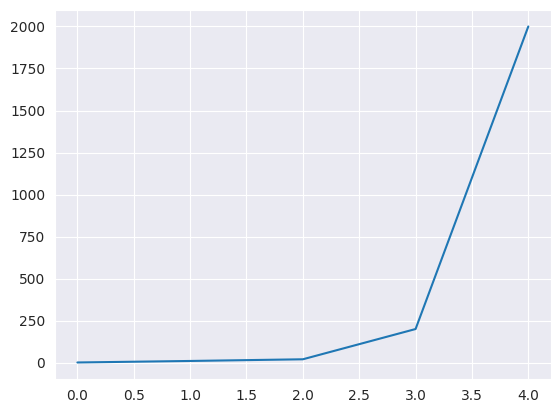

In [115]:
sns.lineplot(x)

<Axes: >

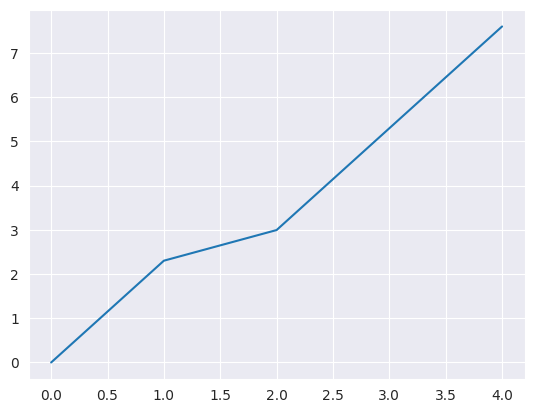

In [116]:
sns.lineplot(np.log(x))

In [117]:
cost_type_df['ctr_log'] = np.log(cost_type_df['ctr'])

In [118]:
cpc = cost_type_df[cost_type_df['ad_cost_type'] == 'CPC']['ctr_log']
cpm = cost_type_df[cost_type_df['ad_cost_type'] == 'CPM']['ctr_log']

In [119]:
ttest_ind(cpc, cpm)

Ttest_indResult(statistic=1.1407296867039143, pvalue=0.25489224816951805)

In [120]:
cpc = cost_type_df[cost_type_df['ad_cost_type'] == 'CPC']['ctr_log']
cpm = cost_type_df[cost_type_df['ad_cost_type'] == 'CPM']['ctr_log']

In [121]:
ttest_ind(cost_type_df[cost_type_df['ad_cost_type'] == 'CPC']['ctr'], cost_type_df[cost_type_df['ad_cost_type'] == 'CPM']['ctr'])

Ttest_indResult(statistic=1.0366111047153586, pvalue=0.3007519549674309)

### Посчитаем cpc и cpm в разрезе платформы

In [122]:
platform_df = ads_grouped.groupby(['ad_id', 'platform'], as_index=False) \
    .agg({'click': 'sum', 'view': 'sum'}).fillna(0)

In [123]:
platform_df.head()

event,ad_id,platform,click,view
0,3,android,5.0,244.0
1,3,ios,3.0,147.0
2,3,web,1.0,99.0
3,2132,android,1.0,55.0
4,2132,ios,0.0,26.0


In [124]:
platform_df = platform_df[(platform_df['view'] > 100) & (platform_df['click'] > 0)]

In [125]:
platform_df['ctr'] = platform_df['click'] / platform_df['view']
platform_df['ctr_log'] = np.log(platform_df['ctr'])

<Axes: xlabel='platform', ylabel='ctr'>

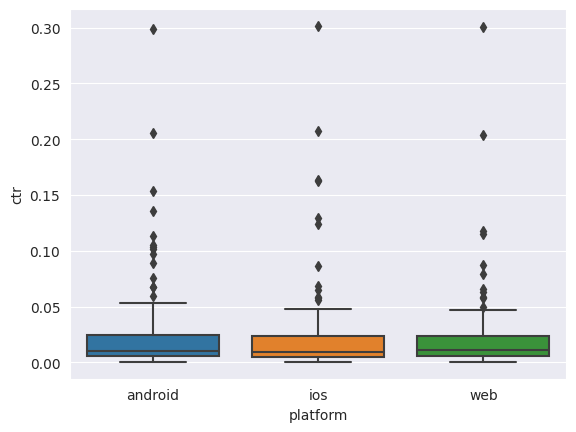

In [126]:
sns.boxplot(data=platform_df, x='platform', y='ctr')

<Axes: xlabel='platform', ylabel='ctr_log'>

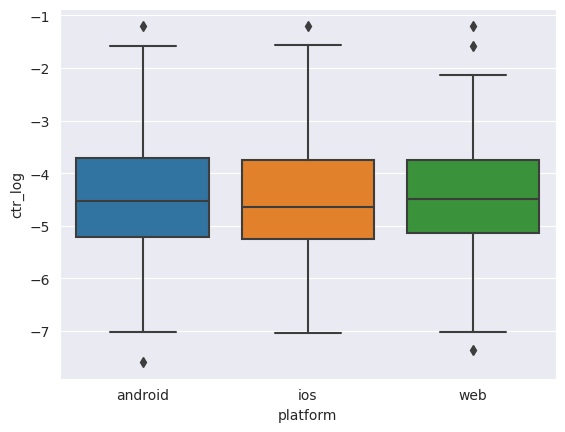

In [127]:
sns.boxplot(data=platform_df, x='platform', y='ctr_log')

In [129]:
f_oneway(platform_df[platform_df['platform'] == 'web']['ctr_log'],
         platform_df[platform_df['platform'] == 'android']['ctr_log'],
         platform_df[platform_df['platform'] == 'ios']['ctr_log'])

F_onewayResult(statistic=0.12221144552264519, pvalue=0.884985296331977)